# Diagonalization of PP Waves by Ivanov
##  Geoff Cope
##  Univeristy of Utah
##  January 5th, 2022

https://arxiv.org/pdf/gr-qc/9705055.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,r,phi,du,dv,dr,dphi = symbols('u v r phi du dv dr dphi')

In [4]:
U = Function('U')(u,r)
U

In [5]:
V = Function('V')(u,r)
V

In [6]:
variables = Matrix( [u,v,r,phi] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢r⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [du,dv,dr,dphi] ) 
differentials

⎡ du ⎤
⎢    ⎥
⎢ dv ⎥
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎣dphi⎦

In [8]:
lineElement = expand( 2*du*dv - exp(-U)* (exp(V) * dr**2 + exp(-V) * dphi**2) ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡0  1           0                    0          ⎤
⎢                                               ⎥
⎢1  0           0                    0          ⎥
⎢                                               ⎥
⎢        -U(u, r)  V(u, r)                      ⎥
⎢0  0  -ℯ        ⋅ℯ                  0          ⎥
⎢                                               ⎥
⎢                             -U(u, r)  -V(u, r)⎥
⎣0  0           0           -ℯ        ⋅ℯ        ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡0  1           0                    0          ⎤
⎢                                               ⎥
⎢1  0           0                    0          ⎥
⎢                                               ⎥
⎢        -U(u, r)  V(u, r)                      ⎥
⎢0  0  -ℯ        ⋅ℯ                  0          ⎥
⎢                                               ⎥
⎢                             -U(u, r)  -V(u, r)⎥
⎣0  0           0           -ℯ        ⋅ℯ        ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("u v r phi")
u,v,r,phi = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                            ⎡           
⎢                                                                                                                            ⎢           
⎢              ⎡0  0                          0                                                  0                        ⎤  ⎢           
⎢              ⎢                                                                                                          ⎥  ⎢           
⎢              ⎢0  0                          0                                                  0                        ⎥  ⎢           
⎢              ⎢                                                                                                          ⎥  ⎢           
⎢⎡0  0  0  0⎤  ⎢      ⎛  ∂             ∂          ⎞  -U(u, r) + V(u, r)                                                   ⎥  ⎢           
⎢⎢          ⎥  ⎢      ⎜- ──(U(u, r

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                 2                               2                                                                      
⎢                    ⎛∂          ⎞                   ⎛∂          ⎞                           ∂           ∂             ∂           ∂     
⎢                    ⎜──(U(u, r))⎟      2            ⎜──(V(u, r))⎟                           ──(U(u, r))⋅──(V(u, r))   ──(V(u, r))⋅──(V(u
⎢                    ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                           ∂r          ∂u            ∂r          ∂u    
⎢                  - ────────────── + ───(U(u, r)) - ──────────────                     0  - ─────────────────────── - ──────────────────
⎢                          2            2                  2                                            2                         2      
⎢                                     ∂u                                                                                                 
⎢                                 

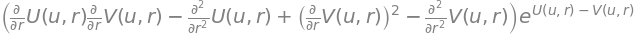

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                       2                               2                                                                
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                                 
⎢                          ⎜──(U(u, r))⎟      2            ⎜──(V(u, r))⎟                                ⎛                              2 
⎢                          ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                                ⎜  ∂           ∂              ∂  
⎢                        - ────────────── + ───(U(u, r)) - ──────────────                           0.5⋅⎜- ──(U(u, r))⋅──(V(u, r)) + ───(
⎢                                2            2                  2                                      ⎜  ∂r          ∂r              2 
⎢                                           ∂u                                                          ⎝                            ∂r  
⎢                                 

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

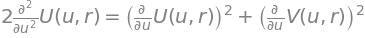

In [25]:
equation23 = Eq( 2 * diff(U,u,u),2 * solve( Ric.tensor()[0,0] , diff(U,u,u) )[0] ) 
equation23

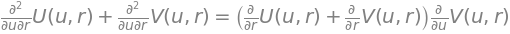

In [35]:
equation24 = Eq( 2 * ( simplify(einst.tensor())[2,0].args[0] + simplify(einst.tensor())[2,0].args[1] ) , collect( (-2) * ( simplify(einst.tensor())[2,0].args[2] + simplify(einst.tensor())[2,0].args[3] ) , diff(V,u) )  ) 
equation24

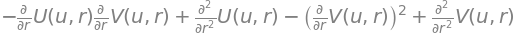

In [40]:
#  I'm too tired to rearrange this... will fix later
equation25 = collect( simplify(einst.tensor())[0,1].args[1] , diff(V,r) ) 
equation25

In [42]:
vacuumFieldEquations = Matrix([equation23,equation24,equation25])
vacuumFieldEquations

⎡                2                         2                2             ⎤
⎢               ∂             ⎛∂          ⎞    ⎛∂          ⎞              ⎥
⎢            2⋅───(U(u, r)) = ⎜──(U(u, r))⎟  + ⎜──(V(u, r))⎟              ⎥
⎢                2            ⎝∂u         ⎠    ⎝∂u         ⎠              ⎥
⎢              ∂u                                                         ⎥
⎢                                                                         ⎥
⎢   2                2                                                    ⎥
⎢  ∂                ∂              ⎛∂             ∂          ⎞ ∂          ⎥
⎢─────(U(u, r)) + ─────(V(u, r)) = ⎜──(U(u, r)) + ──(V(u, r))⎟⋅──(V(u, r))⎥
⎢∂u ∂r            ∂u ∂r            ⎝∂r            ∂r         ⎠ ∂u         ⎥
⎢                                                                         ⎥
⎢                              2                         2     2          ⎥
⎢  ∂           ∂              ∂             ⎛∂          ⎞     ∂           ⎥
⎢- ──(U(u, r